In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv('transaction_dataset.csv')

In [5]:
data.head(5)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,...,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,...,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,...,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,NaN,XENON
3,3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,...,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,...,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [6]:
data.columns

Index(['Unnamed: 0', 'Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 

In [11]:
primary_data_set = data[['Index', 'Address', 'FLAG', 'Time Diff between first and last (Mins)']]

In [12]:
primary_data_set.head()

,Index,Address,FLAG,Time Diff between first and last (Mins)
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,704785.63
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,1218216.73
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,516729.30
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,397555.90
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,382472.42


In [19]:
primary_data_set['FLAG'].value_counts()

FLAG
0    7662
1    2179
Name: count, dtype: int64

In [20]:
primary_data_set.shape

(9841, 4)

In [16]:
def generate_face_attempts(fraud_status):
    if fraud_status == 1:
        # Fraud is more likely to have 3 attempts
        return np.random.choice([1, 2, 3], p=[0.10, 0.30, 0.60])  # Higher chance for 3 attempts
    else:
        # Non-fraud is more likely to have 1 attempt
        return np.random.choice([1, 2, 3], p=[0.70, 0.20, 0.10])  # Higher chance for 1 attempt



In [21]:
primary_data_set['Face Attempts'] = primary_data_set['FLAG'].apply(generate_face_attempts)


C:\Users\madun\AppData\Local\Temp\ipykernel_22132\4022929329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_data_set['Face Attempts'] = primary_data_set['FLAG'].apply(generate_face_attempts)


In [22]:
primary_data_set.head()

,Index,Address,FLAG,Time Diff between first and last (Mins),Face Attempts
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,704785.63,1
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,1218216.73,1
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,516729.30,3
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,397555.90,2
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,382472.42,1


In [24]:
primary_data_set['Face Attempts'].value_counts()

Face Attempts
1    5628
2    2201
3    2012
Name: count, dtype: int64

In [26]:
def detect_robot(fraud_status):
    if fraud_status == 1:
        return np.random.choice([1, 0], p=[0.7, 0.3])
    else:
        return np.random.choice([1, 0], p=[0.05, 0.95])


In [27]:
primary_data_set['Detected As a Robot At Least Once'] = primary_data_set['FLAG'].apply(detect_robot)

C:\Users\madun\AppData\Local\Temp\ipykernel_22132\262413977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_data_set['Detected As a Robot At Least Once'] = primary_data_set['FLAG'].apply(detect_robot)


In [28]:
primary_data_set.head()

,Index,Address,FLAG,Time Diff between first and last (Mins),Face Attempts,Detected As a Robot At Least Once
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,704785.63,1,0
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,1218216.73,1,0
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,516729.30,3,0
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,397555.90,2,0
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,382472.42,1,0


In [29]:
primary_data_set['Detected As a Robot At Least Once'].value_counts()

Detected As a Robot At Least Once
0    7951
1    1890
Name: count, dtype: int64

In [30]:
def generate_face_match(is_fraud):
    if is_fraud == 1:
        return np.random.normal(loc=55, scale=15)  # fraud humans – low match
    else:
        return np.random.normal(loc=92, scale=5)   # legit humans – high match


In [31]:
primary_data_set['Face Match Percentage'] = primary_data_set['FLAG'].apply(generate_face_match)

C:\Users\madun\AppData\Local\Temp\ipykernel_22132\3720980022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_data_set['Face Match Percentage'] = primary_data_set['FLAG'].apply(generate_face_match)


In [34]:
primary_data_set['Face Match Percentage'] = primary_data_set['Face Match Percentage'].clip(0,100)

C:\Users\madun\AppData\Local\Temp\ipykernel_22132\2498855048.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_data_set['Face Match Percentage'] = primary_data_set['Face Match Percentage'].clip(0,100)


In [35]:
primary_data_set['Face Match Percentage'].value_counts()

Face Match Percentage
100.000000    429
62.153860       1
90.385389       1
46.499491       1
95.897539       1
             ... 
55.269113       1
59.202988       1
60.733694       1
43.202253       1
98.026617       1
Name: count, Length: 9413, dtype: int64

In [36]:
primary_data_set.head()

,Index,Address,FLAG,Time Diff between first and last (Mins),Face Attempts,Detected As a Robot At Least Once,Face Match Percentage
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,704785.63,1,0,95.897539
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,1218216.73,1,0,100.000000
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,516729.30,3,0,95.055751
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,397555.90,2,0,97.410889
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,382472.42,1,0,92.543958


In [37]:
print(primary_data_set.columns)

Index(['Index', 'Address', 'FLAG', 'Time Diff between first and last (Mins)',
       'Face Attempts', 'Detected As a Robot At Least Once',
       'Face Match Percentage'],
      dtype='object')


In [38]:
primary_data_set = primary_data_set[['Index', 'Address', 'Time Diff between first and last (Mins)',
       'Face Attempts', 'Detected As a Robot At Least Once',
       'Face Match Percentage', 'FLAG']]

In [39]:
primary_data_set.head()

,Index,Address,Time Diff between first and last (Mins),Face Attempts,Detected As a Robot At Least Once,Face Match Percentage,FLAG
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,704785.63,1,0,95.897539,0
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,1218216.73,1,0,100.000000,0
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,516729.30,3,0,95.055751,0
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,397555.90,2,0,97.410889,0
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,382472.42,1,0,92.543958,0


In [5]:
primary_data_set.to_csv('synthetical_dataset.csv', index=False)

NameError: name 'primary_data_set' is not defined

In [6]:
df = pd.read_csv('synthetical_dataset.csv')

In [7]:
df.head()

,Index,Address,Time Diff between first and last (Mins),Face Attempts,Detected As a Robot At Least Once,Face Match Percentage,FLAG
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,704785.63,1,0,95.897539,0
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,1218216.73,1,0,100.000000,0
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,516729.30,3,0,95.055751,0
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,397555.90,2,0,97.410889,0
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,382472.42,1,0,92.543958,0


In [4]:
df.columns

Index(['Index', 'Address', 'Time Diff between first and last (Mins)',
       'Face Attempts', 'Detected As a Robot At Least Once',
       'Face Match Percentage', 'FLAG'],
      dtype='object')

In [5]:
def generate_liveness(row):
    if row['FLAG'] == 0:  # Not fraud
        base = np.random.uniform(90, 100)
        if row['Face Attempts'] == 3:
            base -= 15
        if row['Face Match Percentage'] < 70:
            base -= 20
    else:  # Fraud
        base = np.random.uniform(20, 59)
        if row['Face Attempts'] == 1 and row['Face Match Percentage'] > 80:
            base += 10  # Maybe smart spoofing

    return max(0, min(100, round(base, 2)))

In [6]:
df['Liveness Score of The Face'] = df.apply(generate_liveness, axis=1)

In [9]:
df.head()

,Index,Address,Time Diff between first and last (Mins),Face Attempts,Detected As a Robot At Least Once,Face Match Percentage,Liveness Score of The Face,FLAG
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,704785.63,1,0,95.897539,94.13,0
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,1218216.73,1,0,100.000000,93.65,0
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,516729.30,3,0,95.055751,78.86,0
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,397555.90,2,0,97.410889,99.82,0
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,382472.42,1,0,92.543958,92.95,0


In [8]:
df = df[['Index', 'Address', 'Time Diff between first and last (Mins)',
       'Face Attempts', 'Detected As a Robot At Least Once',
       'Face Match Percentage', 'Liveness Score of The Face', 'FLAG']]

In [10]:
df.to_csv('new_synthetical_dataset.csv', index=False)

In [1]:
df.head

NameError: name 'df' is not defined

In [8]:
df = pd.read_csv('new_synthetical_dataset.csv')

In [9]:
df1 = pd.read_csv('transaction_dataset.csv')

In [10]:
df.shape

(9841, 8)

In [11]:
df1.shape

(9841, 51)

In [12]:
df.dtypes

Index                                        int64
Address                                     object
Time Diff between first and last (Mins)    float64
Face Attempts                                int64
Detected As a Robot At Least Once            int64
Face Match Percentage                      float64
Liveness Score of The Face                 float64
FLAG                                         int64
dtype: object

In [13]:
duplicates = df[df.duplicated()]

In [14]:
duplicates

,Index,Address,Time Diff between first and last (Mins),Face Attempts,Detected As a Robot At Least Once,Face Match Percentage,Liveness Score of The Face,FLAG


# No duplicates

In [15]:
df.isnull().sum()

Index                                      0
Address                                    0
Time Diff between first and last (Mins)    0
Face Attempts                              0
Detected As a Robot At Least Once          0
Face Match Percentage                      0
Liveness Score of The Face                 0
FLAG                                       0
dtype: int64

# No null values

In [19]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
numerical_df.drop(columns=['Index'], inplace=True)

In [20]:
numerical_df.head()

,Time Diff between first and last (Mins),Face Attempts,Detected As a Robot At Least Once,Face Match Percentage,Liveness Score of The Face,FLAG
0,704785.63,1,0,95.897539,94.13,0
1,1218216.73,1,0,100.000000,93.65,0
2,516729.30,3,0,95.055751,78.86,0
3,397555.90,2,0,97.410889,99.82,0
4,382472.42,1,0,92.543958,92.95,0


In [21]:
correlation_matrix = numerical_df.corr()

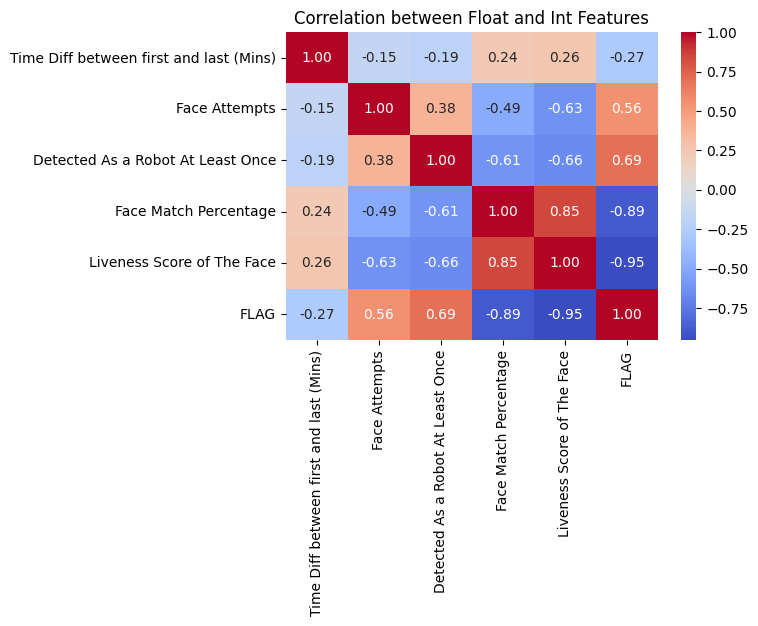

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between Float and Int Features")
plt.show()

# Has a high co relation between Liveness of the face and Face match percentage

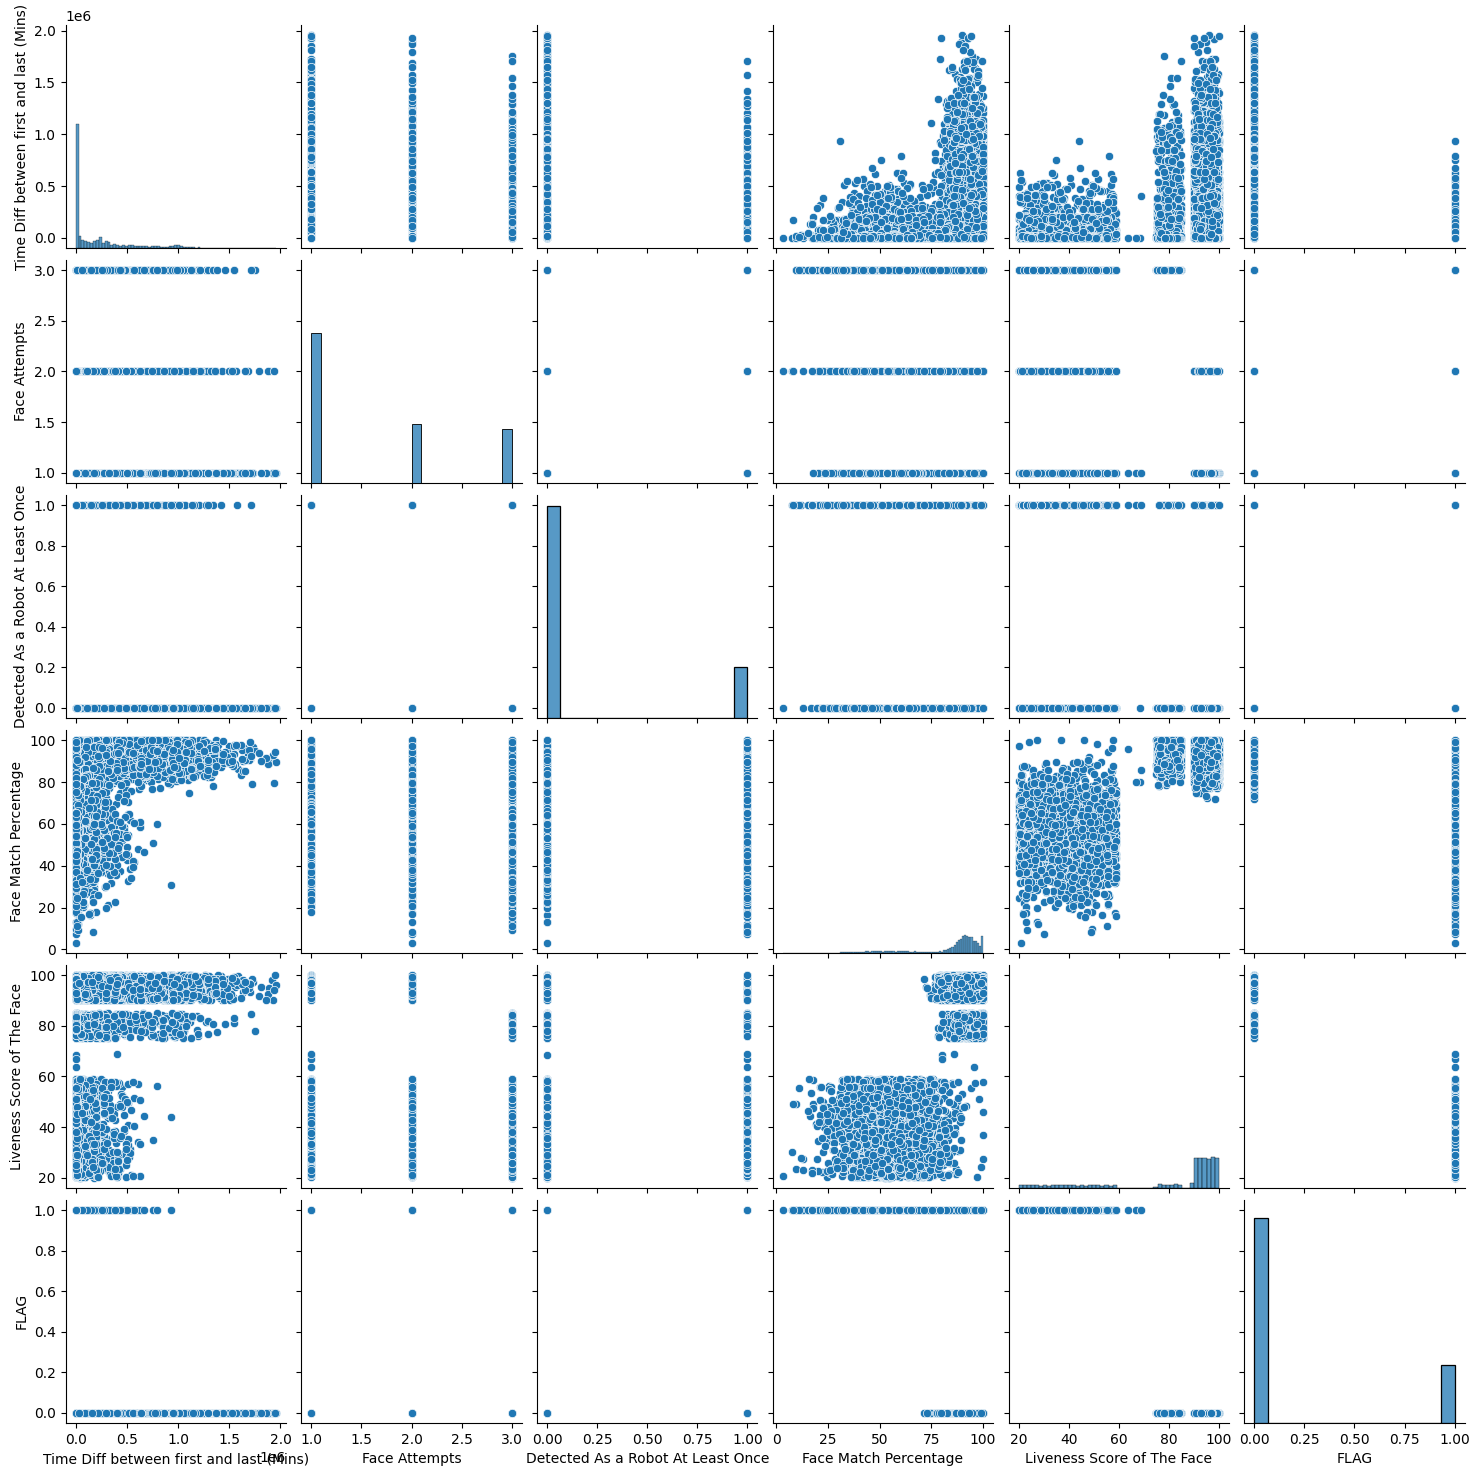

In [24]:
sns.pairplot(numerical_df)
plt.show()

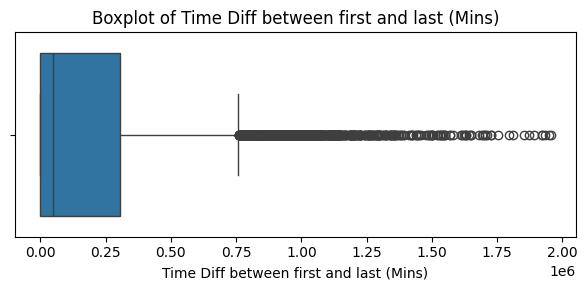

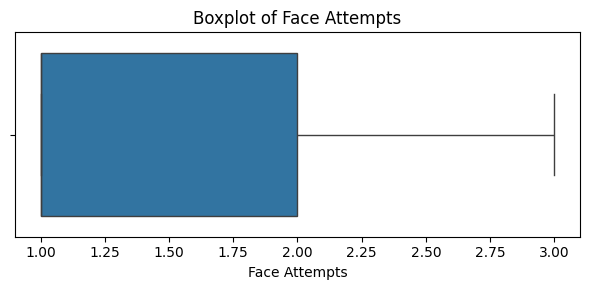

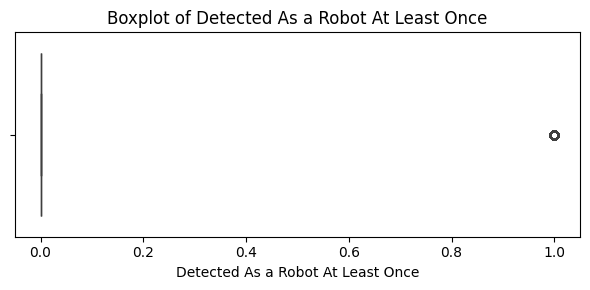

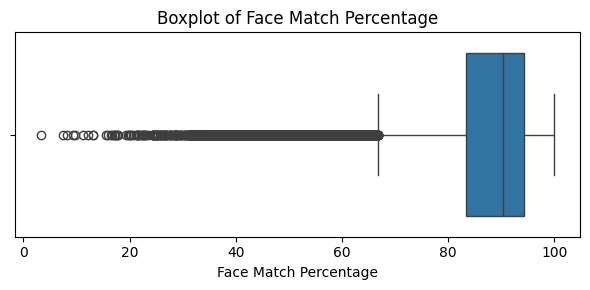

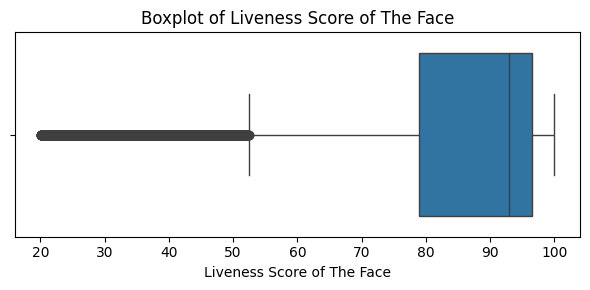

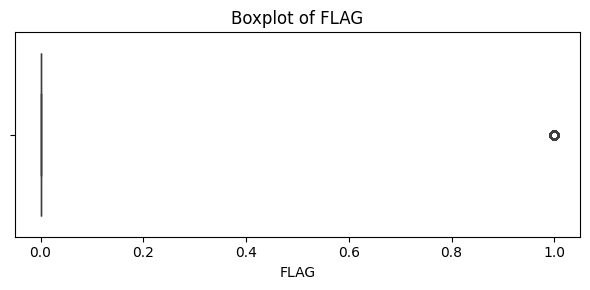

In [25]:
for col in numerical_df.columns:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=numerical_df[col])
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X = numerical_df.drop('FLAG', axis=1)  # replace with your actual target column name (like 'is_fraud')
y = numerical_df['FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [27]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X = scaler.transform(X)

In [30]:
X.shape

(9841, 5)

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

In [29]:
y_pred = model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# More details (precision, recall, F1)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[2299    0]
 [   0  654]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2299
           1       1.00      1.00      1.00       654

    accuracy                           1.00      2953
   macro avg       1.00      1.00      1.00      2953
weighted avg       1.00      1.00      1.00      2953



# Well now got 100% accuracy
# Now let's create a test dataset 